In [1]:
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
conn = sql.connect('database.sqlite')

In [3]:
pd.read_sql_query('select * from sqlite_master', conn)

,type,name,tbl_name,rootpage,sql
0,table,Salaries,Salaries,2,CREATE TABLE Salaries (\n Id INTEGER PRIMAR...
1,index,salaries_year_idx,Salaries,16566,CREATE INDEX salaries_year_idx ON Salaries (Year)


In [4]:
pd.read_sql_query('select * from salaries', conn)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,9999999.00,567595.43,2011,,San Francisco,
1,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
2,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
3,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,
4,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602,8601,189082.74,,316285.74,316285.74,2011,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148648,148650,Roy I Tillery,Custodian,0,0,0,0,0.00,0.00,2014,,San Francisco,PT
148649,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148650,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148651,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,


In [5]:
def sql_query(q):
    return pd.read_sql_query(q,conn)

## ***Question No.1***

#### **Top 10 highest paid employees (by TotalPayBenefits)**

In [6]:
q = '''select employeename as 'Employee Name', totalpaybenefits as 'Total Pay Benefits' from salaries
    order by 2 desc limit 10
'''

sql_query(q)

,Employee Name,Total Pay Benefits
0,NATHANIEL FORD,567595.43
1,David Shinn,510732.68
2,Amy P Hart,479652.21
3,William J Coaker Jr.,436224.36
4,Gregory P Suhr,425815.28
5,Joanne M Hayes-White,422353.40
6,Gregory P Suhr,418019.22
7,Joanne M Hayes-White,417435.10
8,Ellen G Moffatt,415767.94
9,Gary Altenberg,407274.78


## ***Question No.2***

#### **Find which year has missing data of Employees with 'Not Provided'/ 'Not provided'**

In [7]:
q = '''select year, count(*) as 'Not_Provided'
       from salaries
       where jobtitle in ('Not Provided', 'Not provided')
          or employeename in ('Not Provided', 'Not provided')
       group by year
       order by 2 desc
'''

sql_query(q)

,Year,Not_Provided
0,2014,4
1,2011,1
2,2012,1


## ***Question No.3***

#### **Number of unique agencies**

In [8]:
q = '''select count(distinct agency) as 'Unique Agencies'
       from salaries
       '''

sql_query(q)

,Unique Agencies
0,1


## ***Question No.4***

#### **Show Average BasePay, OvertimePay, and TotalPay for year 2011**

In [9]:
q = '''select year, 
    Round(AVG(basepay), 2) as 'Avg Basepay', 
    Round(AVG(overtimepay), 2) as 'Avg Overtime pay', 
    Round(AVG(totalpay), 2) as 'Avg Total pay'
    from salaries 
    where year = 2011
    '''

sql_query(q)

,Year,Avg Basepay,Avg Overtime pay,Avg Total pay
0,2011,63593.4,4524.41,71992.05


## ***Question No.5***

#### **Plot the top 10 job titles with the highest TotalPay in 2014**

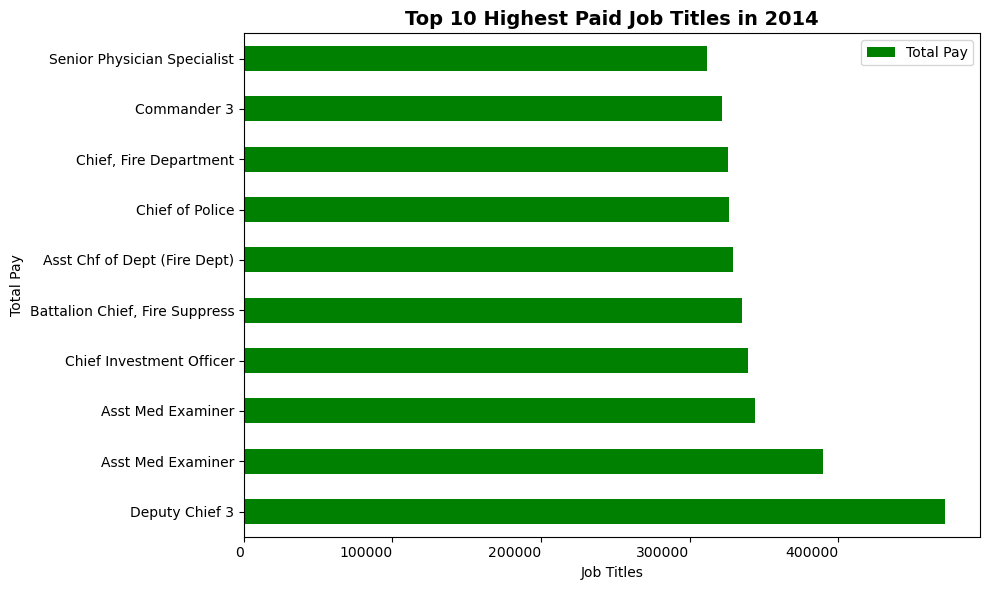

In [10]:
q = '''select distinct jobtitle as 'Job Titles', totalpay as  'Total Pay'
    from salaries where year = 2014 
    order by 2 desc
    limit 10
    '''

t = sql_query(q)

t.plot(kind='barh', x='Job Titles', y='Total Pay', color='green', figsize=(10,6))
plt.title('Top 10 Highest Paid Job Titles in 2014', fontweight='bold', fontsize=14)
plt.xlabel('Job Titles')
plt.ylabel('Total Pay')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

## ***Question No.6***

#### **Which job titles have overtime pay exceeding $150,000 exluding 'Not provided'**

In [11]:
q = '''select distinct jobtitle as 'Job Title', overtimepay as 'Overtime Pay'
    from salaries 
    where overtimepay > 150000 
    and jobtitle not in ('Not provided', 'Not Provided')
    order by 2 desc
    '''

sql_query(q)

,Job Title,Overtime Pay
0,"Lieutenant, Fire Suppression",220909.48
1,Deputy Sheriff,196689.18
2,EMT/Paramedic/Firefighter,192424.49
3,Deputy Sheriff,173547.73
4,Deputy Sheriff,173178.23
5,Deputy Sheriff,169659.92
6,"Lieutenant, Fire Suppression",163477.81
7,Firefighter,160418.47
8,Deputy Sheriff,156077.49


## ***Question No.7***

#### **Find all employees whose job titles contain the word “CHIEF”**

In [12]:
q = '''select distinct employeename as 'Employee Name', Jobtitle as 'Job Title'
    from salaries 
    where Jobtitle like '%CHIEF%'
    order by 2
    '''

sql_query(q)

#Used distinct to remove duplications of same employee appearing multiple times with 'CHIEF' in their Jobtitle

,Employee Name,Job Title
0,ROBERT BRYAN,ASSISTANT CHIEF ATTORNEY I
1,JULIA M C FRIEDLANDER,ASSISTANT CHIEF ATTORNEY I
2,JULIE VAN NOSTERN,ASSISTANT CHIEF ATTORNEY I
3,ALEETA VAN RUNKLE,ASSISTANT CHIEF ATTORNEY I
4,DONALD MARGOLIS,ASSISTANT CHIEF ATTORNEY I
...,...,...
518,Charlie Orkes,Deputy Chief 3
519,Hector M Sainez,Deputy Chief 3
520,Sharon Ferrigno,Deputy Chief 3
521,Jeffrey Myers,Emergency Medical Svcs Chief


## ***Question No.8***

#### **Count how many employees have job titles containing “ENGINEER” and “Fire” in year 2012 and 2013**

In [13]:
q = '''select count(*) as 'Count of Employees having ENGINEER & Fire Job title in 2012 & 2013'
    from salaries 
    where year in (2012, 2013)
    and Jobtitle like '%ENGINEER%' and  Jobtitle like '%Fire%'
    '''

sql_query(q)

,Count of Employees having ENGINEER & Fire Job title in 2012 & 2013
0,16


In [14]:
# Without count approach which gives all the employee names

q = '''select employeename as 'Employee Name', Jobtitle as 'Job Title', year
    from salaries 
    where year in (2012, 2013)
    and Jobtitle like '%ENGINEER%' and  Jobtitle like '%Fire%'
    order by 3
    '''

sql_query(q)

,Employee Name,Job Title,Year
0,Nathan Hardy,Marine Engineer of Fire Boats,2012
1,David Owen,Marine Engineer of Fire Boats,2012
2,Richard Currie,Marine Engineer of Fire Boats,2012
3,Sagiv Weiss-Ishai,Fire Protection Engineer,2012
4,Jon Corbett,Fire Protection Engineer,2012
5,Frederick Stumpp,Fire Protection Engineer,2012
6,Jose Albano,Fire Protection Engineer,2012
7,Andrew Burda Jr,Marine Engineer of Fire Boats,2012
8,Nathan J Hardy,Marine Engineer of Fire Boats,2013
9,David C Owen,Marine Engineer of Fire Boats,2013


## ***Question No.9***

#### **Distinct job titles starting with "CAPTAIN"**

In [15]:
q = '''select distinct jobtitle as 'Job Titles' from salaries
    where jobtitle like 'CAPTAIN%'
    order by jobtitle'''

sql_query(q)

,Job Titles
0,CAPTAIN III (POLICE DEPARTMENT)
1,"CAPTAIN, BUREAU OF FIRE PREVENTION AND PUBLIC ..."
2,"CAPTAIN, EMERGENCYCY MEDICAL SERVICES"
3,"CAPTAIN, FIRE SUPPRESSION"
4,Captain 3
5,"Captain, (Fire Department)"
6,"Captain, Emergency Med Svcs"
7,"Captain, Fire Suppression"


## ***Question No.10***

#### **Employees having basepay > 50k and totalpay < 150000 excluding 'Not Provided'**

In [16]:
q = '''select employeename 'Employee Name', basepay 'Base Pay', totalpay 'Total Pay' from salaries
    where employeename not in ('Not provided', 'Not Provided') 
    and basepay > 50000 
    and totalpay < 150000
    order by employeename'''

sql_query(q)

,Employee Name,Base Pay,Total Pay
0,A JAMIL NIAZI,69058.19,87496.21
1,AARON BALLONADO,107162.62,127281.97
2,AARON BRINKERHOFF,87619.12,87619.12
3,AARON COWHIG,110242.94,122613.42
4,AARON CRAIG,55646.08,66133.86
...,...,...,...
87253,Zuna T Luu,55026,56155.44
87254,Zuna T Luu,54703,56087.91
87255,Zuri Jones,71986.9,71986.90
87256,Zuri Jones,86588.52,86588.52


In [17]:
conn.close()